# Pre-Processing

In [1]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

data=pd.read_csv('C://Users/Hassan/Downloads/breastcancer/data.csv')

data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df=data
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
df['diagnosis']=lb.fit_transform(df['diagnosis'])

df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Data Splitting

In [7]:
X=df.iloc[:,1:32].values
#X
y=df.iloc[:,0].values

In [8]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(455, 30)

In [10]:
X_test.shape

(114, 30)

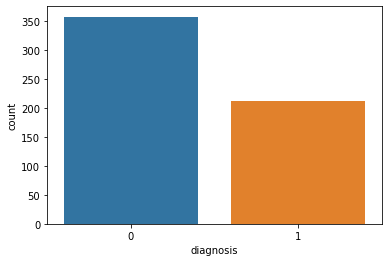

In [11]:
sns.countplot(df['diagnosis'])
plt.ioff()

# SVM Classifier

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model=SVC(C=1, gamma='auto', kernel='linear')
svc_model.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [13]:
y_predict=svc_model.predict(X_test)


In [17]:
#cm=confusion_matrix(y_test,y_predict)
#sns.heatmap(cm/np.sum(cm),annot=True)
#plt.ioff()

In [18]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))


Accuracy: 0.956140350877193


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_Df = clf.predict(X_test)



In [36]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred_Df))

print(classification_report(y_test,y_pred_Df))


#cm=confusion_matrix(y_test,y_pred_Df)
#sns.heatmap(cm/np.sum(cm),annot=True)
#plt.ioff()

Decision Tree Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



# ADA Boost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

abclf =AdaBoostClassifier(n_estimators=100,learning_rate=1)

# Train Adaboost Classifer
model = abclf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_Ada= model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Adaboost Accuracy:",metrics.accuracy_score(y_test, y_pred_Ada))
print(classification_report(y_test,y_pred_Ada))

#cm=confusion_matrix(y_test,y_pred_Ada)
#sns.heatmap(cm/np.sum(cm),annot=True)
#plt.ioff()

Adaboost Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# MLP Classifier

In [69]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=400,activation = 'relu',solver='adam',random_state=2)

classifier.fit(X_train, y_train)

y_pred_MLP = classifier.predict(X_test)



In [70]:
print("MLP Accuracy:",metrics.accuracy_score(y_test, y_pred_MLP))
print(classification_report(y_test,y_pred_MLP))

#cm=confusion_matrix(y_test,y_pred_MLP)
#sns.heatmap(cm/np.sum(cm),annot=True)
#plt.ioff()

MLP Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        71
           1       0.97      0.86      0.91        43

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



# Random Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred_RF=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))

print(classification_report(y_test,y_pred_RF))


Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

